In [33]:
import zipfile
import os

test_zip_path = 'test.zip'
extracted_train_folder = 'train_images'
extracted_test_folder = 'test_images'
os.makedirs(extracted_train_folder, exist_ok=True)
os.makedirs(extracted_test_folder, exist_ok=True)
try:
    with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_train_folder)
    print(f"'{train_zip_path}' extracted to '{extracted_train_folder}'")
except FileNotFoundError:
    print(f"Error: '{train_zip_path}' not found. Please make sure the file is uploaded.")
except Exception as e:
    print(f"An error occurred during extraction of '{train_zip_path}': {e}")

try:
    with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_test_folder)
    print(f"'{test_zip_path}' extracted to '{extracted_test_folder}'")
except FileNotFoundError:
    print(f"Error: '{test_zip_path}' not found. Please make sure the file is uploaded.")
except Exception as e:
    print(f"An error occurred during extraction of '{test_zip_path}': {e}")

'train.zip' extracted to 'train_images'
'test.zip' extracted to 'test_images'


In [34]:
import os
import cv2
import numpy as np

extracted_train_folder = 'train_images'
extracted_test_folder = 'test_images'
image_size = (100, 100)
X_train = []
y_train = []
X_test = []
y_test = []
def load_images_from_folder(folder_path):
    image_data = []
    labels = []
    if not os.path.exists(folder_path):
        print(f"Error: The directory '{folder_path}' was not found.")
        return image_data, labels 

    for filename in os.listdir(folder_path):
        if filename.lower().endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, image_size)
                img = img.flatten()
                image_data.append(img)
                if "cat" in filename.lower():
                    labels.append(0)  
                elif "dog" in filename.lower():
                    labels.append(1)  
                else:
                    continue
    return image_data, labels
X_train, y_train = load_images_from_folder(extracted_train_folder)
X_test, y_test = load_images_from_folder(extracted_test_folder)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(f"Loaded {len(X_train)} training images.")
print(f"Training image data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Loaded {len(X_test)} testing images.")
print(f"Testing image data shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

Loaded 62 training images.
Training image data shape: (62, 30000)
Training labels shape: (62,)
Loaded 50 testing images.
Testing image data shape: (50, 30000)
Testing labels shape: (0,)


In [35]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
print("SVM model trained successfully.")

SVM model trained successfully.


In [36]:
y_pred = svm_model.predict(X_test)
print("Predictions on the test set:")
print(y_pred)

Predictions on the test set:
[0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0
 1 1 1 0 1 0 1 1 0 1 1 0 1]


In [37]:
label_map = {0: "cat", 1: "dog"}
y_pred_text = [label_map[pred] for pred in y_pred]
print("Predictions on the test set (text labels):")
print(y_pred_text)

Predictions on the test set (text labels):
['cat', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog']


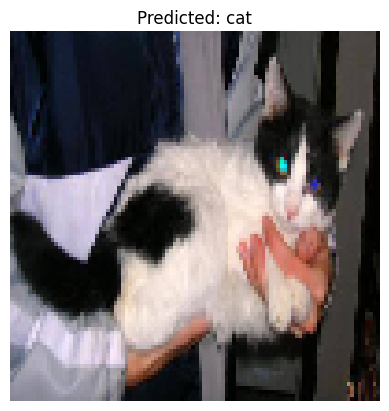

In [32]:
import matplotlib.pyplot as plt
import os
import cv2
import random
example_index = random.randint(0, len(X_test) - 1) 
example_image_data = X_test[example_index]
example_prediction = y_pred_text[example_index]
image_height, image_width = image_size
image_channels = 3 
example_image_reshaped = example_image_data.reshape(image_height, image_width, image_channels)
plt.imshow(cv2.cvtColor(example_image_reshaped, cv2.COLOR_BGR2RGB)) 
plt.title(f"Predicted: {example_prediction}")
plt.axis('off')
plt.show()